In [19]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()
plt.rcParams.update({'font.size': 22})

In [20]:
x = sp.Function("x")
x0 = sp.Symbol("x_0", real = True)
v0 = sp.Symbol("v_0", real = True)
ww = sp.Symbol("omega", real = True, positive = True)
w = sp.Symbol("omega_0", real = True, positive = True)
A = sp.Symbol("A", real = True)
t = sp.Symbol("t")
beta = sp.Symbol("beta", real = True)
x(t),ww,w,beta, A, t, x0, v0

### *Tłumiony*







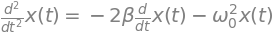

In [40]:
damped = sp.Eq(x(t).diff(t,2), -2*beta*x(t).diff(t) -w**2*x(t))
damped

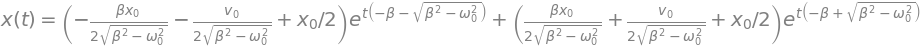

In [41]:
damped_x = sp.dsolve(damped,x(t), ics = {x(0) : x0, x(t).diff(t).subs(t,0) : v0})
damped_x

Text(0.5, 1.0, 'Damped harmonic oscillator (const beta)')

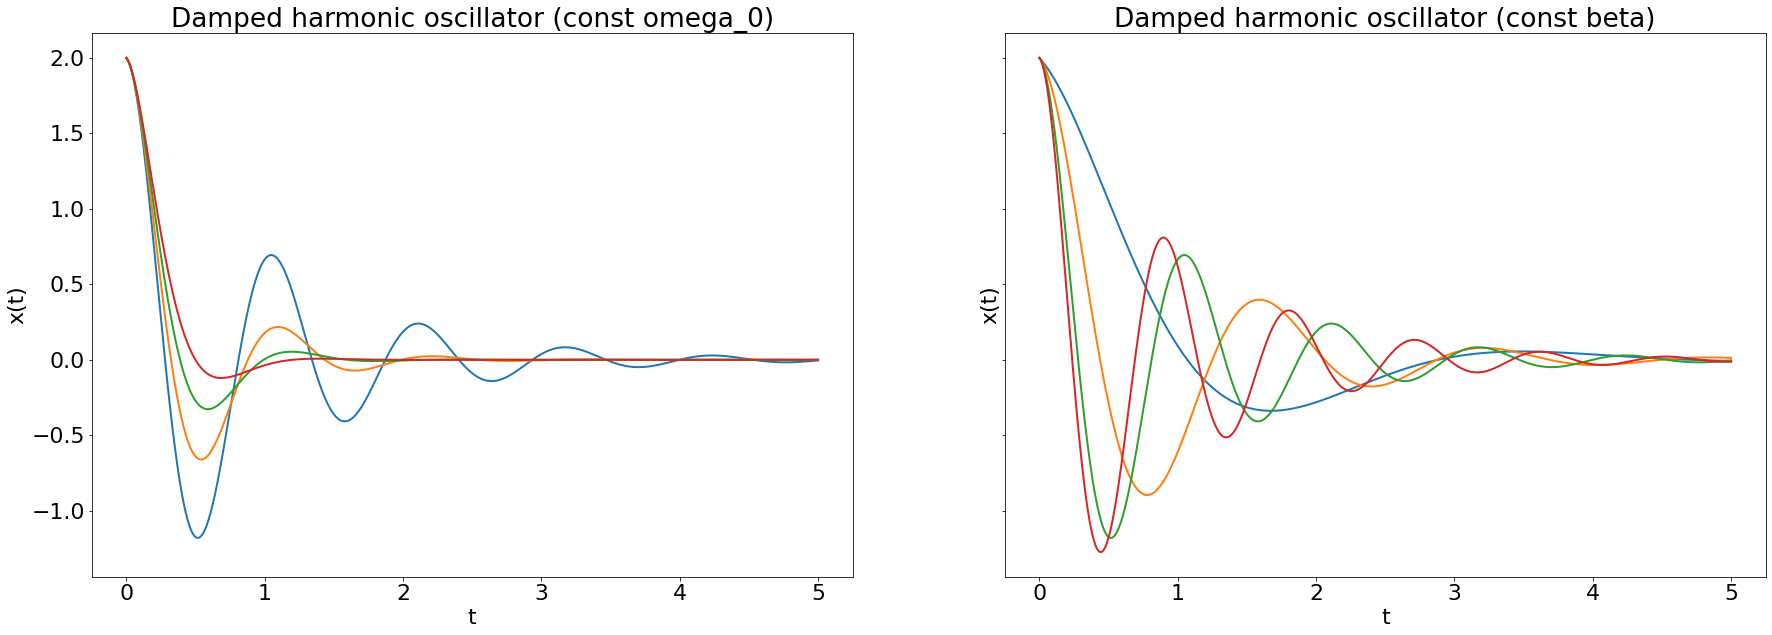

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10),sharex = True, sharey = True)
xx = np.linspace(0,5,10000)
for i,j in zip([1,2,3,4,7,8],[2,4,6,7]):
  ende = sp.lambdify(t,damped_x.rhs.subs({x0 : 2, v0 : -1, beta : i , w : 6}))
  ende2 = sp.lambdify(t,damped_x.rhs.subs({x0 : 2, v0 : -1, beta : 1 , w : j}))
  ax1.plot(xx,ende(xx).real, linewidth = 2)
  ax2.plot(xx,ende2(xx).real, linewidth = 2)
plt.tick_params(which='both')
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("x(t)")
ax1.set_title(r"Damped harmonic oscillator (const omega_0)")
ax2.set_title(r"Damped harmonic oscillator (const beta)")

### *Driven*

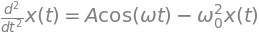

In [43]:
driven = sp.Eq(x(t).diff(t,2), -w**2*x(t) + A*sp.cos(ww*t))
driven

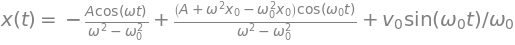

In [44]:
driven_x = sp.dsolve(driven,x(t), ics = {x(0) : x0, x(t).diff(t).subs(t,0) : v0})
driven_x

Text(0.5, 1.0, 'Driven harmonic oscillator (beta = 1)')

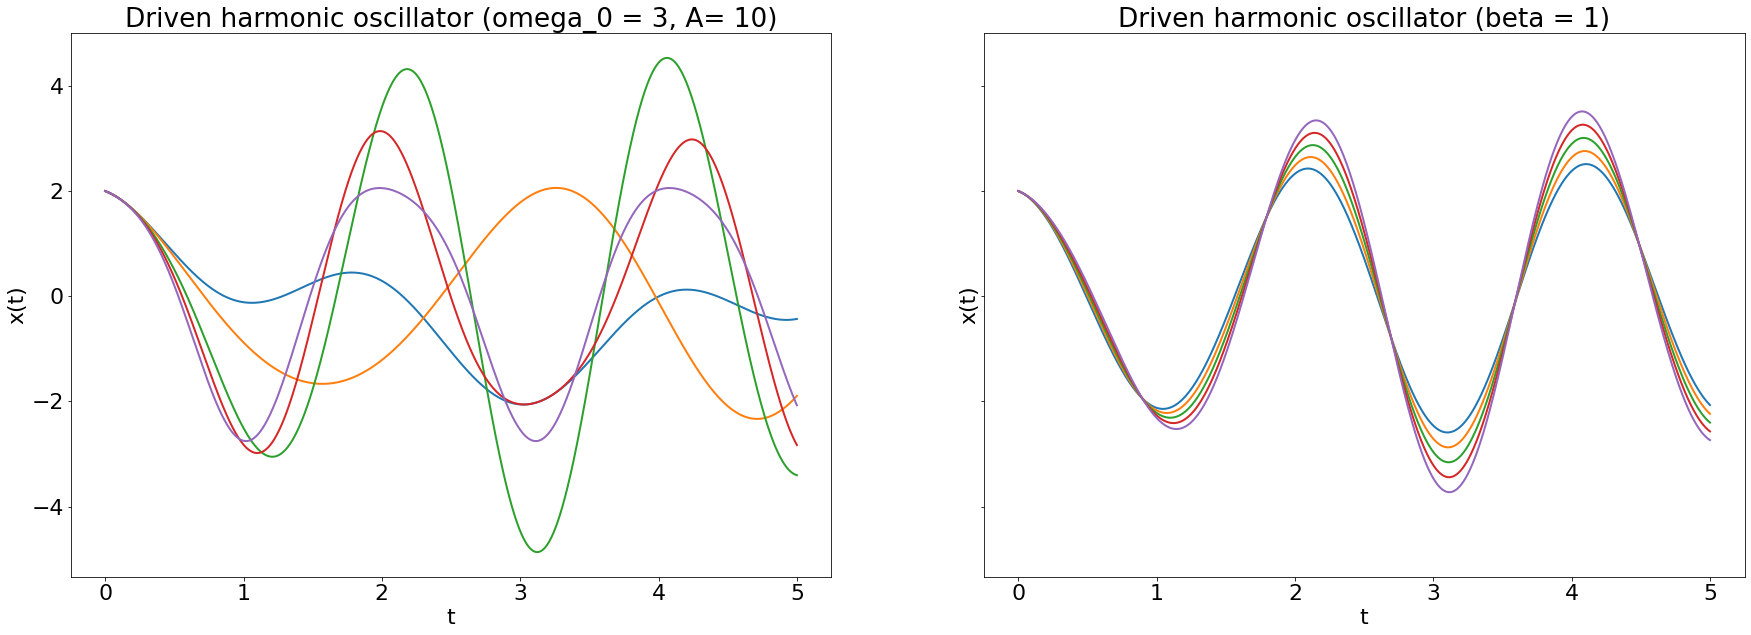

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10),sharex = True, sharey = True)
xx = np.linspace(0,5,10000)
for i,j in zip([1,2,4,5,6],[2,3,4,5,6]):
  ende = sp.lambdify(t,driven_x.rhs.subs({x0 : 2, v0 : -1, w : 3, A : 10, ww : i}))
  ende2 = sp.lambdify(t,driven_x.rhs.subs({x0 : 2, v0 : -1, w : 3, A : j, ww : 4}))
  ax1.plot(xx,ende(xx).real, linewidth = 2)
  ax2.plot(xx,ende2(xx).real, linewidth = 2)
plt.tick_params(which='both')
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("x(t)")
ax1.set_title(r"Driven harmonic oscillator (omega_0 = 3, A= 10)")
ax2.set_title(r"Driven harmonic oscillator (beta = 1)")

### Tłumiony z wymuszeniem

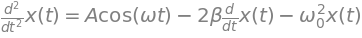

In [55]:
driven_damped = sp.Eq(x(t).diff(t,2), -2*beta*x(t).diff(t) -w**2*x(t) + A*sp.cos(ww*t))
driven_damped

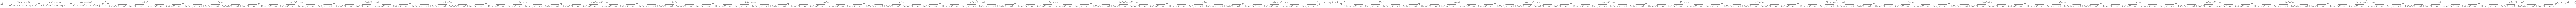

In [56]:
driven_damped_x = sp.dsolve(driven_damped,x(t), ics = {x(0) : x0, x(t).diff(t).subs(t,0) : v0})
driven_damped_x

Text(0.5, 1.0, 'Damped driven harmonic oscillator (beta =1, A=3)')

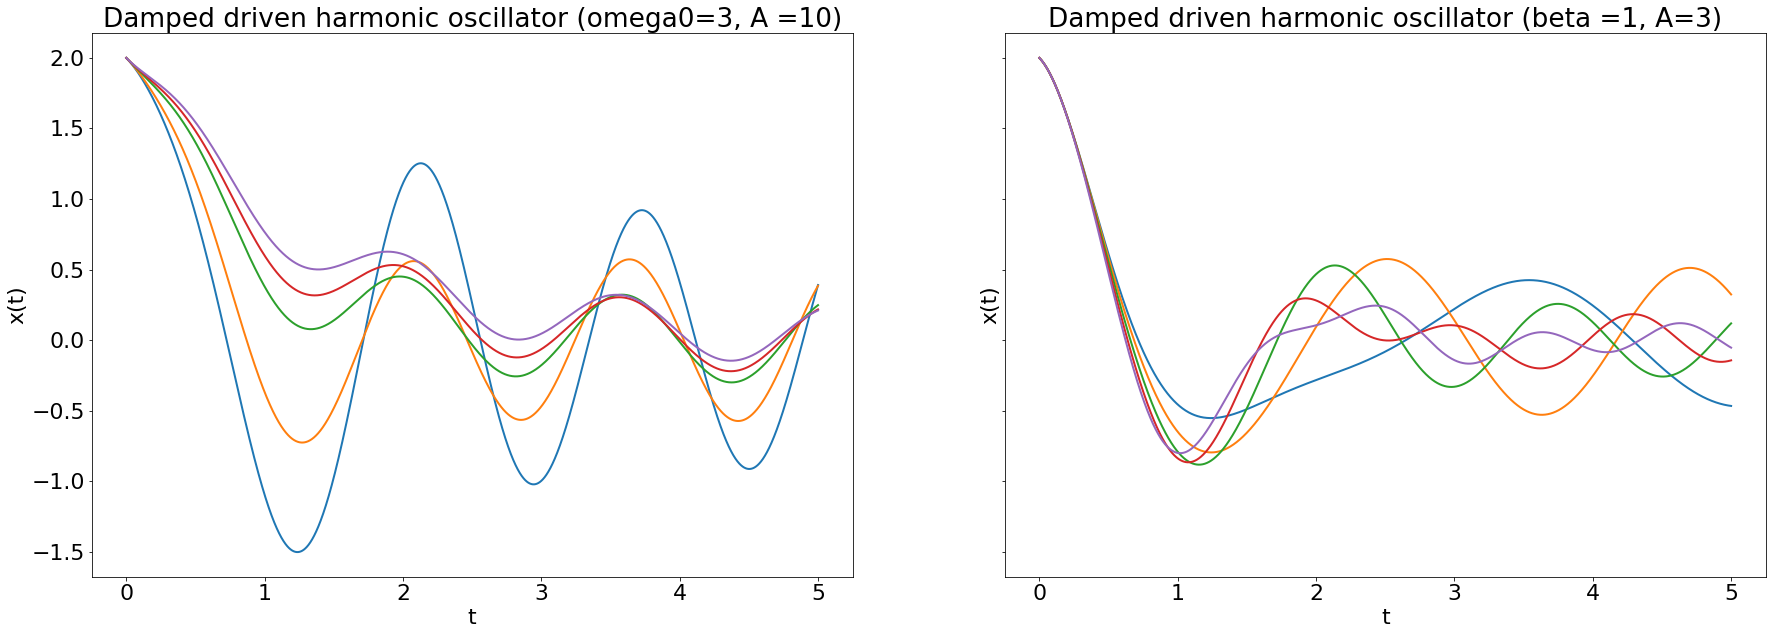

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10),sharex = True, sharey = True)
xx = np.linspace(0,5,10000)
for i,j in zip([1,2,4,5,6],[2,3,4,5,6]):
  ende = sp.lambdify(t,driven_damped_x.rhs.subs({x0 : 2, v0 : -1, beta : i , w : 3, A : 10, ww : 4}))
  ende2 = sp.lambdify(t,driven_damped_x.rhs.subs({x0 : 2, v0 : -1, beta : 1 , w : 3, A : 3, ww : j}))
  ax1.plot(xx,ende(xx).real, linewidth = 2)
  ax2.plot(xx,ende2(xx).real, linewidth = 2)
plt.tick_params(which='both')
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("x(t)")
ax1.set_title(r"Damped driven harmonic oscillator (omega0=3, A =10)")
ax2.set_title(r"Damped driven harmonic oscillator (beta =1, A=3)")
     